<a href="https://colab.research.google.com/github/cindykhris/SummerInternship2020/blob/master/SummerInternship2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pine Biotech Summer Reasearch

**Cindy Pino**


Abstract: In this study, we will analyze the gene expression differnt coronaviruses (CoVs) infections to determine how each virus differs when causing a disease. Here, we focuses the analysis on samples from SARS-CoV-1, MERS, and SARS-CoV-2. 
The raw sequence data (fastq files) for the SARS-CoV-1 and MERS infections were downloaded from GEO [GSE56192](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE56192), including their corresponding Mock-treated controls). The raw sequence data (fastq files) for the SARS-CoV-2 infections were downloaded from GEO ([GSE147507](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE147507)), including their corresponding Mock-treated controls). 

In this Jupyter notebook, I will use both R and Python to analyze three viruses: MERS, SARS-CoV-1, amd SARS-CoV-2

##Using R and Python in the same Notebook
First, let's active R magic. Don't forget to use %%R before running a R code 


---

In [151]:
#active R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


##Import all the folders we will need for this files (R and Python)

###Python

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###R

In [168]:
%%R
install.packages('DESeq2', lib = "/usr/lib/R/library")

In [172]:
%%R
install.packages('dplyr', lib = "/usr/lib/R/library")

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.0.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 935654 bytes (913 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]:

In [173]:
%%R
install.packages('EnhancedVolcano',lib = "/usr/lib/R/library")


In [174]:
%%R
install.packages('ggplot',lib = "/usr/lib/R/library")


## SARS-CoV
Severe Acute Respiratory Syndrom Coronavirus (SARS-CoV) was first identified in 20013 (WHO). 

In [125]:
%%R
df = read.table('drive/My Drive/SummerResearch/DESeq_SARS_expression_genes_FPKM.txt',skip = 1, header = TRUE)


In [126]:
%%R
# Cleaning the file for processing
ColNames1 <- df$id #take the column name
df = df[,-1] #take the data part - numeric values
df=as.matrix(df)

In [127]:
%%R
names(df) <- NULL

In [128]:
%%R
#Remove NAs from dataset
datanew <- na.exclude(df)

In [129]:
%%R
#Remove zeroes 
data <- filter(df, undersirable != 0)
head(data,10)

R[write to console]: Error in filter(df, undersirable != 0) : object 'undersirable' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible -> filter




Error in filter(df, undersirable != 0) : object 'undersirable' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible -> filter


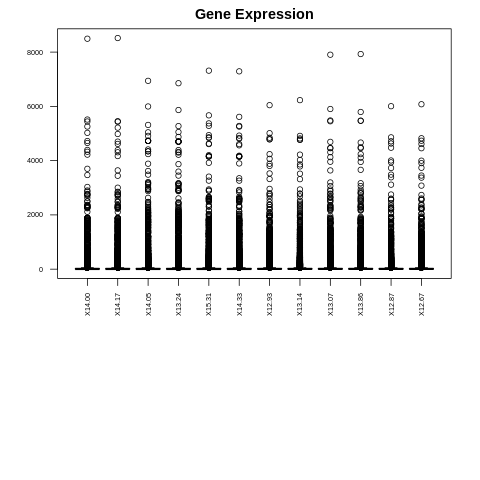

In [130]:
%%R
#Basic Settings:

colors <- c(rep('red',6),rep('blue',3),rep('green',2),rep('gray',2))
par(mar=c(14,4,2,2))
boxplot(df, main="Gene Expression",las = 2, cex.axis=0.6)


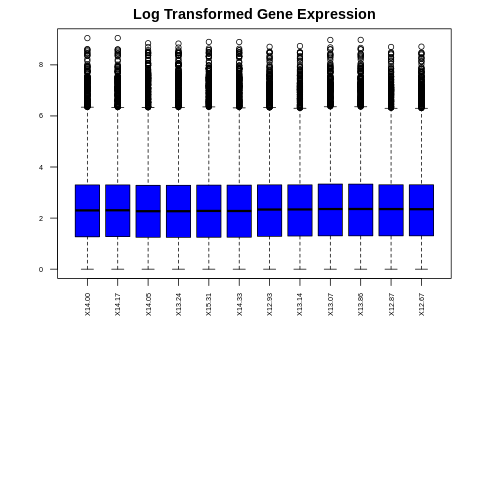

In [122]:

%%R
#Log transformation
logdata <- log(df+1)
par(mar=c(14,4,2,2))
boxplot(logdata, main="Log Transformed Gene Expression", col = 'blue', las = 2, cex.axis=0.6)


In [109]:
%%R
#Descriptive statistics
summary(df)

     X14.00            X14.17            X14.05            X13.24       
 Min.   :   0.00   Min.   :   0.00   Min.   :   0.00   Min.   :   0.00  
 1st Qu.:   2.55   1st Qu.:   2.58   1st Qu.:   2.48   1st Qu.:   2.47  
 Median :   8.98   Median :   9.03   Median :   8.67   Median :   8.67  
 Mean   :  46.00   Mean   :  45.98   Mean   :  49.29   Mean   :  49.19  
 3rd Qu.:  26.11   3rd Qu.:  26.11   3rd Qu.:  25.63   3rd Qu.:  25.67  
 Max.   :8494.14   Max.   :8518.84   Max.   :6941.47   Max.   :6853.46  
     X15.31             X14.33            X12.93             X13.14        
 Min.   :   0.000   Min.   :   0.00   Min.   :   0.000   Min.   :   0.000  
 1st Qu.:   2.487   1st Qu.:   2.49   1st Qu.:   2.610   1st Qu.:   2.660  
 Median :   8.785   Median :   8.75   Median :   9.325   Median :   9.365  
 Mean   :  47.898   Mean   :  47.84   Mean   :  43.011   Mean   :  43.016  
 3rd Qu.:  25.885   3rd Qu.:  25.90   3rd Qu.:  26.163   3rd Qu.:  26.170  
 Max.   :7316.370   Max.   :7291.

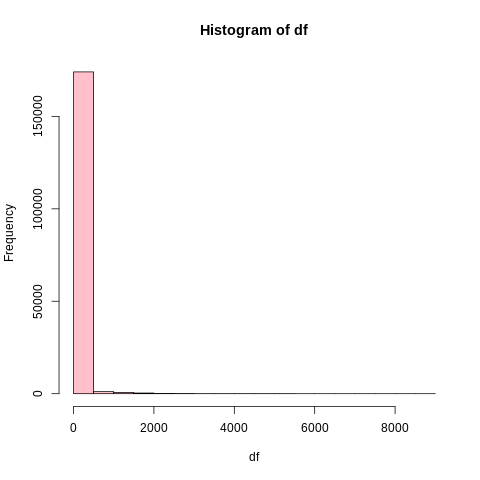

In [110]:
%%R
hist(df, col='pink')


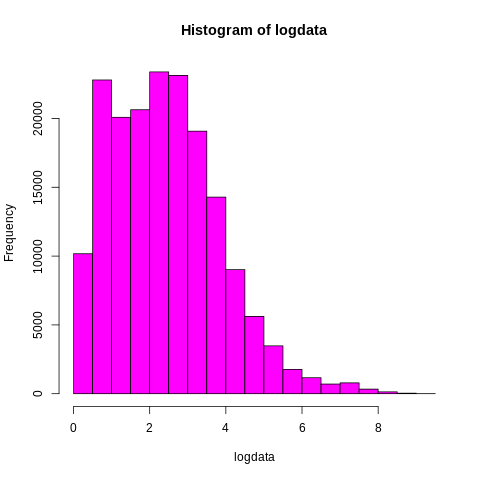

In [111]:
%%R
hist(logdata, col='magenta')

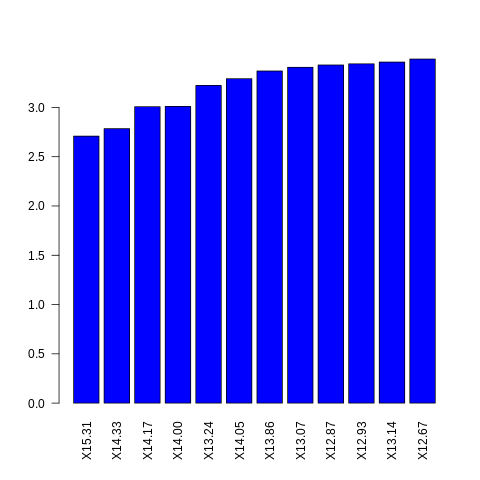

In [137]:
%%R
barplot(sort(logdata[100,]), col = "blue", main = ColNames1[2], font.axis=1, cex.axis=1, las=2)


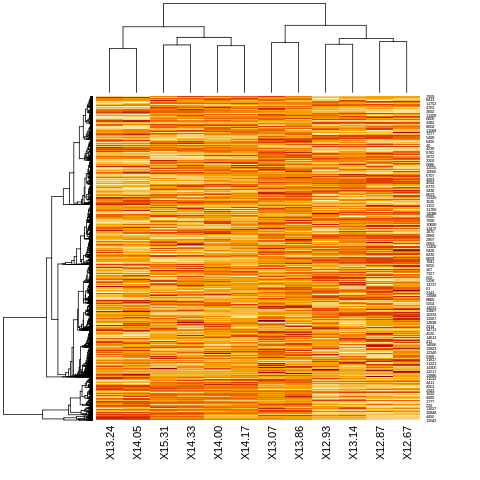

In [138]:
%%R
heatmap(logdata)

###DESeq2 
Differential Gene Expression

In [141]:
%%R
# Load the file - raw count
PDXdataset <- read.table("drive/My Drive/SummerResearch/DESeq_SARS_expression_genes.txt", header = TRUE, sep='\t')
head(PDXdataset)

                  id group_1_sample_1_SRR1192353_PE
1 ENSG00000000003.13                        1005.00
2 ENSG00000000419.11                        1407.00
3 ENSG00000000457.12                         386.15
4 ENSG00000000460.15                         374.02
5 ENSG00000000938.11                           0.00
6 ENSG00000000971.14                        1038.05
  group_1_sample_2_SRR1192354_PE group_1_sample_3_SRR1192370_PE
1                        1016.58                        1011.00
2                        1360.00                        1702.00
3                         371.19                         369.27
4                         339.90                         232.66
5                           0.00                           0.00
6                         990.08                        1041.82
  group_1_sample_4_SRR1192371_PE group_1_sample_5_SRR1192398_PE
1                         952.00                         979.00
2                        1645.00                        1193

In [143]:
%%R
#Create a dataframe - columns and rows
data <- (PDXdataset)
colnames(PDXdataset) -> names
meta_classes <- c('MK','MK','MK','MK','MK','MK','SA','SA','SA','SA','SA','SA','SA')
meta_data <- data.frame(names, meta_classes)

In [147]:
%%R
#Construct DESeq2 dataset object and filter the zeroes
ds <- DESeqDataSetFromMatrix(countData = data, colData = meta_data, design = ~meta_classes)
ds = ds[rowSums(counts(ds))>2,]



R[write to console]: Error in DESeqDataSetFromMatrix(countData = data, colData = meta_data,  : 
  could not find function "DESeqDataSetFromMatrix"
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in DESeqDataSetFromMatrix(countData = data, colData = meta_data,  : 
  could not find function "DESeqDataSetFromMatrix"
Calls: <Anonymous> -> <Anonymous> -> withVisible


In [148]:
%%R

deseq2Data <- DESeq(ds)

R[write to console]: Error in DESeq(ds) : could not find function "DESeq"
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in DESeq(ds) : could not find function "DESeq"
Calls: <Anonymous> -> <Anonymous> -> withVisible
